# Results

In [1]:
import pandas as pd
import numpy as np
import seaborn 
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from mpl_toolkits.mplot3d import Axes3D

In [2]:
StarClass = 'rrlyr'

In [8]:
Data = pd.read_csv('allResultsvaeflat1.csv')
kwargs = {
          "ylabel": 'Components', 
          "xlabel": "Degree ",
          "zlabel":'Marginal Likelihood',
          "title":'Bayesian Kernel Logistic Regression', 
          "bar":False 
}
Data.head()

,Unnamed: 0,Size,Components,l,pol,class,Marg. Likelihood,Modified Prior,accTrain,accTest,f1Train,f1Test,timeCV,timeML,timepost
0,0,10000,2,True,1,RL,-2710.906205,flat,0.915100,0.612736,0.917218,0.629444,206.320685,15.639328,80.504869
1,1,10000,2,True,2,RL,-1717.699126,flat,0.940700,0.627300,0.944224,0.616568,545.852496,15.855246,129.891667
2,2,10000,2,True,3,RL,-1706.466352,flat,0.941000,0.631266,0.945280,0.622918,717.837606,15.745756,169.947194
3,3,10000,4,True,1,RL,-1306.856247,flat,0.963925,0.639945,0.964619,0.651851,505.104791,15.448766,125.217318
4,4,10000,4,True,2,RL,-779.232390,flat,0.979750,0.666407,0.980906,0.694638,945.673146,16.422392,225.779299


In [4]:
rrLyrae = Data#[Data['class']==StarClass]
rrLyrae = rrLyrae[rrLyrae['Modified Prior']=='flat']
rrLyrae.sort_values(by=['Marg. Likelihood'], ascending=False).head()

,Unnamed: 0,Size,Components,l,pol,class,Marg. Likelihood,Modified Prior,accTrain,accTest,f1Train,f1Test,timeCV,timeML,timepost
29,29,10000,20,True,3,RL,-422.805746,flat,0.990100,0.652233,0.990404,0.658865,6871.311842,28.641733,1642.182866
28,28,10000,20,True,2,RL,-422.917112,flat,0.989650,0.662506,0.990666,0.663926,4436.276609,22.067334,1045.627172
26,26,10000,18,True,3,RL,-445.310375,flat,0.989550,0.674631,0.990289,0.684647,6318.871218,26.919699,1520.127007
25,25,10000,18,True,2,RL,-453.436903,flat,0.988575,0.672128,0.989194,0.675941,4074.814849,20.982967,971.275000
23,23,10000,16,True,3,RL,-475.339657,flat,0.988700,0.682075,0.989427,0.693359,5701.350379,24.545130,1347.032007


In [5]:
#rrLyrae = Data[Data['class']==StarClass]
#rrLyrae = rrLyrae[rrLyrae['Modified Prior']=='normal']

newData = rrLyrae[['Components', 'pol', 'Marg. Likelihood', 'accTrain', 'accTest', 'f1Train', 'f1Test']]
#rrLyrae['delta'] = rrLyrae['accTrain']-rrLyrae['accTest'] 
newData.sort_values(by=['Marg. Likelihood'], ascending=False).round(3).head(5).to_latex()

'\\begin{tabular}{lrrrrrrr}\n\\toprule\n{} &  Components &  pol &  Marg. Likelihood &  accTrain &  accTest &  f1Train &  f1Test \\\\\n\\midrule\n29 &          20 &    3 &          -422.806 &     0.990 &    0.652 &    0.990 &   0.659 \\\\\n28 &          20 &    2 &          -422.917 &     0.990 &    0.663 &    0.991 &   0.664 \\\\\n26 &          18 &    3 &          -445.310 &     0.990 &    0.675 &    0.990 &   0.685 \\\\\n25 &          18 &    2 &          -453.437 &     0.989 &    0.672 &    0.989 &   0.676 \\\\\n23 &          16 &    3 &          -475.340 &     0.989 &    0.682 &    0.989 &   0.693 \\\\\n\\bottomrule\n\\end{tabular}\n'

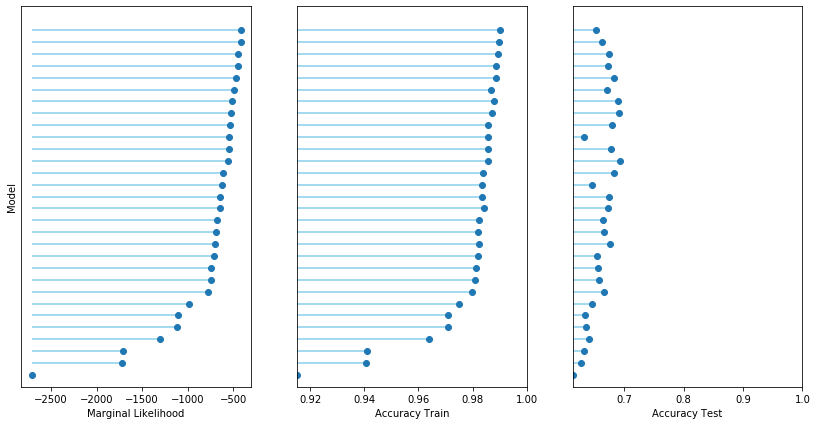

In [6]:
ordered_df = rrLyrae.sort_values(by=['Marg. Likelihood'], ascending=True)
my_range=range(1,len(rrLyrae.index)+1)
plt.figure(figsize=(14,7)) 
plt.subplot(1, 3, 1)
SMALL_SIZE = 10
plt.rc('font', size=SMALL_SIZE)
plt.rc('axes', titlesize=SMALL_SIZE)
import seaborn as sns
plt.hlines(y=my_range, xmin=ordered_df['Marg. Likelihood'].min(), xmax=ordered_df['Marg. Likelihood'], color='skyblue')
plt.plot(ordered_df['Marg. Likelihood'], my_range, "o")
plt.xlabel('Marginal Likelihood')
plt.ylabel('Model')
plt.ylim(0, len(rrLyrae.index)+2)
plt.yticks([])

plt.subplot(1, 3, 2)
plt.hlines(y=my_range, xmin=ordered_df['accTrain'].min(), xmax=ordered_df['accTrain'], color='skyblue')
plt.plot(ordered_df['accTrain'], my_range, "o")
plt.xlabel('Accuracy Train')
#plt.ylabel('Model')
plt.ylim(0, len(rrLyrae.index)+2)
plt.yticks([])
plt.xlim(ordered_df['accTrain'].min(), 1)

plt.subplot(1, 3, 3)
plt.hlines(y=my_range, xmin=ordered_df['accTest'].min(), xmax=ordered_df['accTest'], color='skyblue')
plt.plot(ordered_df['accTest'], my_range, "o")
plt.xlabel('Accuracy Test')
plt.ylim(0, len(rrLyrae.index)+2)
plt.xlim(ordered_df['accTest'].min(), 1)
plt.yticks([])
plt.show()

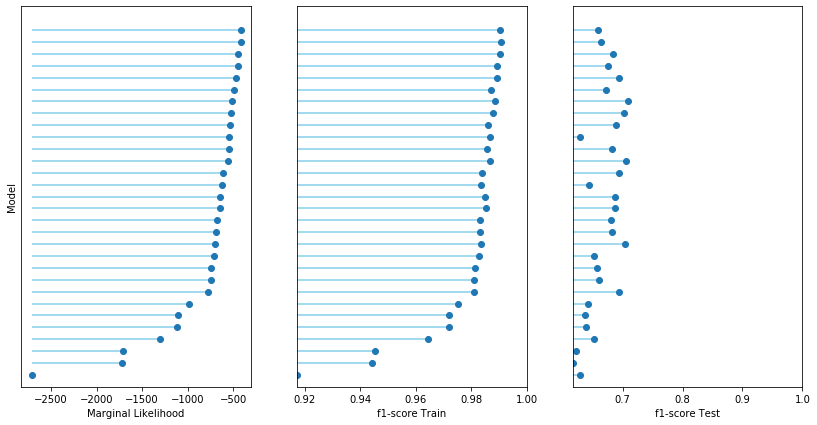

In [38]:
ordered_df = rrLyrae.sort_values(by=['Marg. Likelihood'], ascending=True)
my_range=range(1,len(rrLyrae.index)+1)
plt.figure(figsize=(14,7)) 
plt.subplot(1, 3, 1)
SMALL_SIZE = 10
plt.rc('font', size=SMALL_SIZE)
plt.rc('axes', titlesize=SMALL_SIZE)
import seaborn as sns
plt.hlines(y=my_range, xmin=ordered_df['Marg. Likelihood'].min(), xmax=ordered_df['Marg. Likelihood'], color='skyblue')
plt.plot(ordered_df['Marg. Likelihood'], my_range, "o")
plt.xlabel('Marginal Likelihood')
plt.ylabel('Model')
plt.ylim(0, len(rrLyrae.index)+2)
plt.yticks([])

plt.subplot(1, 3, 2)
plt.hlines(y=my_range, xmin=ordered_df['f1Train'].min(), xmax=ordered_df['f1Train'], color='skyblue')
plt.plot(ordered_df['f1Train'], my_range, "o")
plt.xlabel('f1-score Train')
#plt.ylabel('Model')
plt.ylim(0, len(rrLyrae.index)+2)
plt.yticks([])
plt.xlim(ordered_df['f1Train'].min(), 1)

plt.subplot(1, 3, 3)
plt.hlines(y=my_range, xmin=ordered_df['f1Test'].min(), xmax=ordered_df['f1Test'], color='skyblue')
plt.plot(ordered_df['f1Test'], my_range, "o")
plt.xlabel('f1-score Test')
plt.ylim(0, len(rrLyrae.index)+2)
plt.xlim(ordered_df['f1Test'].min(), 1)
plt.yticks([])
plt.show()

In [8]:
rrLyrae.sort_values(by=['accTrain'], ascending=False).head()

,Unnamed: 0,Size,Components,l,pol,class,Marg. Likelihood,Modified Prior,accTrain,accTest,f1Train,f1Test,timeCV,timeML,timepost
29,29,10000,20,True,3,RL,-422.805746,flat,0.990100,0.652233,0.990404,0.658865,6871.311842,28.641733,1642.182866
28,28,10000,20,True,2,RL,-422.917112,flat,0.989650,0.662506,0.990666,0.663926,4436.276609,22.067334,1045.627172
26,26,10000,18,True,3,RL,-445.310375,flat,0.989550,0.674631,0.990289,0.684647,6318.871218,26.919699,1520.127007
23,23,10000,16,True,3,RL,-475.339657,flat,0.988700,0.682075,0.989427,0.693359,5701.350379,24.545130,1347.032007
25,25,10000,18,True,2,RL,-453.436903,flat,0.988575,0.672128,0.989194,0.675941,4074.814849,20.982967,971.275000


In [9]:
rrLyrae.sort_values(by=['f1Train'], ascending=False).head()

,Unnamed: 0,Size,Components,l,pol,class,Marg. Likelihood,Modified Prior,accTrain,accTest,f1Train,f1Test,timeCV,timeML,timepost
28,28,10000,20,True,2,RL,-422.917112,flat,0.989650,0.662506,0.990666,0.663926,4436.276609,22.067334,1045.627172
29,29,10000,20,True,3,RL,-422.805746,flat,0.990100,0.652233,0.990404,0.658865,6871.311842,28.641733,1642.182866
26,26,10000,18,True,3,RL,-445.310375,flat,0.989550,0.674631,0.990289,0.684647,6318.871218,26.919699,1520.127007
23,23,10000,16,True,3,RL,-475.339657,flat,0.988700,0.682075,0.989427,0.693359,5701.350379,24.545130,1347.032007
25,25,10000,18,True,2,RL,-453.436903,flat,0.988575,0.672128,0.989194,0.675941,4074.814849,20.982967,971.275000


In [11]:
#rrLyrae.sort_values(by=['map_logp'], ascending=False).head()

In [23]:
def surface_plot(X,Y,Z,**kwargs):
    """ WRITE DOCUMENTATION """
    xlabel, ylabel, zlabel, title = kwargs.get('xlabel',""), kwargs.get('ylabel',""), kwargs.get('zlabel',""), kwargs.get('title',"")
    fig = plt.figure(figsize=(12,8))
    fig.patch.set_facecolor('white')
    ax = fig.add_subplot(111, projection='3d')
    SMALL_SIZE = 6
    plt.rc('font', size=SMALL_SIZE)
    plt.rc('axes', titlesize=SMALL_SIZE)
    #X, Y = np.meshgrid(X, Y)
    bar = kwargs['bar']
    if bar == True:
        ax.bar(Y, -Z, zs=X, zdir='x')
    else: 
        mlMax = Z.max()
        hiddenMax = Y.iloc[Z.idxmax()]
        componentMax = X.iloc[Z.idxmax()]
        Y.drop(Z.idxmax())
        X.drop(Z.idxmax())
        Z.drop(Z.idxmax())
        ax.scatter(componentMax,hiddenMax, mlMax, color='red',linewidth=5, marker='o')
        ax.scatter(X,Y,Z,linewidth=3, marker='o')
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_zlabel(zlabel)
    ax.set_title(title)
    plt.show()
    plt.close()

In [24]:
#rrLyraeNormal.Components

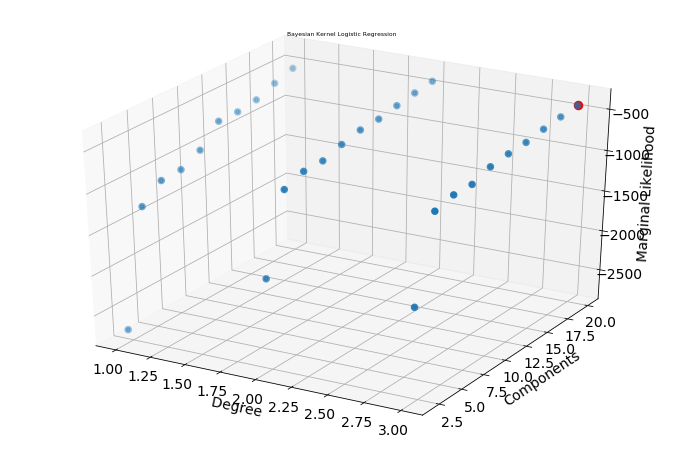

In [25]:
#rrLyrae = Data[Data['class']==StarClass]
#rrLyraeNormal = rrLyrae[rrLyrae['Modified Prior']=='normal']

rrLyraeNormal = rrLyrae.reset_index()
surface_plot(rrLyraeNormal.pol,rrLyraeNormal.Components, rrLyraeNormal['Marg. Likelihood'],**kwargs)

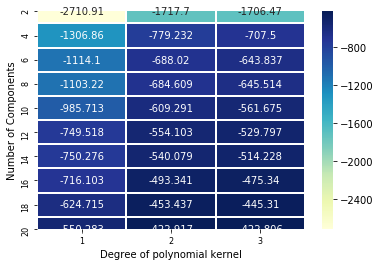

In [31]:
import seaborn as sns
sizePlot = 10
rc={'axes.labelsize': sizePlot, 'font.size': sizePlot, 'legend.fontsize':sizePlot, 'axes.titlesize': sizePlot, 'axes.labelsize': sizePlot, 
    'xtick.labelsize': sizePlot,  'ytick.labelsize': sizePlot}
plt.rcParams.update(**rc)


result = rrLyraeNormal.pivot(index='Components', columns='pol', values='Marg. Likelihood')
b= sns.heatmap(result, annot=True,annot_kws={"size": sizePlot}, fmt="g", cmap="YlGnBu", linewidths=1)
b.set_xlabel('Degree of polynomial kernel',fontsize=sizePlot)
b.set_ylabel('Number of Components',fontsize=sizePlot)
#b.set_style("ticks", {"xtick.major.size": sizePlot, "ytick.major.size": sizePlot})
b.tick_params(labelsize=8)




In [ ]:
result

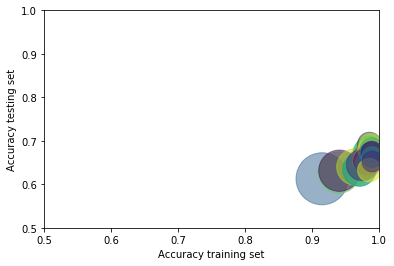

In [32]:
#Data = Data[Data['class']==StarClass]
dataNormal = Data[Data['Modified Prior']=='flat']
colors = np.random.rand(dataNormal.shape[0])
plt.xlim((0.5,1))
plt.ylim((0.5,1))
plt.xlabel('Accuracy training set')
plt.ylabel('Accuracy testing set')
plt.scatter(dataNormal['accTrain'], dataNormal['accTest'], s=-dataNormal['Marg. Likelihood'], c=colors, alpha=0.5)
plt.show()

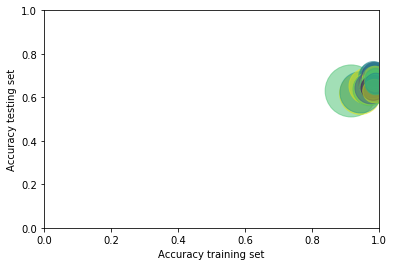

In [33]:
#Data = Data[Data['class']==StarClass]
#print(Data)
dataNormal = Data[Data['Modified Prior']=='flat']
colors = np.random.rand(dataNormal.shape[0])
plt.xlim((0,1))
plt.ylim((0,1))
plt.xlabel('Accuracy training set')
plt.ylabel('Accuracy testing set')
plt.scatter(dataNormal['f1Train'], dataNormal['f1Test'], s=-dataNormal['Marg. Likelihood'], c=colors, alpha=0.5)
plt.show()

In [41]:
rrLyraeNormal = dataNormal[dataNormal['pol']==1]

No handles with labels found to put in legend.


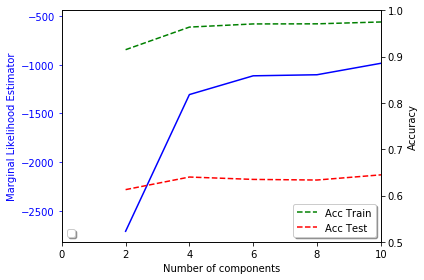

In [44]:
fig, ax1 = plt.subplots()
#t = np.arange(0.01, 10.0, 0.01)
#s1 = np.exp(t)
ax1.plot(rrLyraeNormal.Components, rrLyraeNormal['Marg. Likelihood'], 'b-')
ax1.set_xlabel('Number of components')
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('Marginal Likelihood Estimator', color='b')
ax1.tick_params('y', colors='b')
#ax1.set_ylim(-700,-500)
ax2 = ax1.twinx()
ax2.set_ylim(0.5,1)
ax2.set_xlim(0,10)
#s2 = np.sin(2 * np.pi * t)
ax2.plot(rrLyraeNormal.Components, rrLyraeNormal['accTrain'], 'g--', label = 'Acc Train')
ax2.plot(rrLyraeNormal.Components, rrLyraeNormal['accTest'], 'r--', label = 'Acc Test')
#ax2.plot(rrLyraeNormal.Components, rrLyraeNormal['f1Test'], 'r-^', label = 'F1 Test')
#ax2.plot(rrLyraeNormal.Components, rrLyraeNormal['f1Train'], 'g-^', label = 'F1 Train')
ax2.set_ylabel('Accuracy', color='black')
ax2.tick_params('y', colors='black')
#ax2.ylim(0.6, 1)
legend = ax2.legend(loc='lower right', shadow=True)
legend = ax1.legend(loc='lower left', shadow=True)
fig.tight_layout()
plt.show()